In [2]:
import arcgis
from arcgis.gis import GIS
import os
import pandas as pd

from arcgis.geoenrichment import *
from dotenv import load_dotenv
import requests
import geopandas as gpd
import matplotlib.pyplot as plt

load_dotenv()

def request_token():
  #Datos de tu aplicación
  client_id = os.getenv("CLIENT_ID")
  client_secret = os.getenv("CLIENT_SECRET")

  # URL del endpoint de autenticación
  auth_url = "https://www.arcgis.com/sharing/rest/oauth2/token"

  # Parámetros para la solicitud de token
  payload = {
      "client_id": client_id,
      "client_secret": client_secret,
      "grant_type": "client_credentials"
  }

  # Realiza la solicitud de token
  response = requests.post(auth_url, data=payload)

  # Verifica si la solicitud fue exitosa
  if response.status_code == 200:
      # Extrae el token de acceso del JSON de respuesta
      access_token = response.json()["access_token"]
      return access_token
  else:
      print("Error:", response.json()["error"])
      
access_token = request_token()

c:\ProgramData\Anaconda3\lib\site-packages\arcgis\features\_data\geodataset\utils.py:16: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime,


In [26]:


map_data = gpd.read_file("file.geojson")
zip_map = gpd.read_file("fl_florida_zip_codes_geo.min.json")
zip_codes = pd.read_csv("zip_code_database.csv")

In [2]:
import pandas as pd
import requests

url = "https://files.zillowstatic.com/research/public_csvs/zhvi/Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1693954783"

response = requests.get(url)

if response.status_code == 200:
    # Content has been successfully retrieved
    csv_data = response.text
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")
    csv_data = None


In [5]:

# Read the CSV data into a DataFrame
df = pd.read_csv(csv_data)
# Now, you can work with the DataFrame 'df' as needed
print(df.head())  # Print the first few rows of the DataFrame


In [27]:
zip_codes["county, state"] = zip_codes["county"] + ", " + zip_codes["state"]
zip_map["ZCTA5CE10"] = zip_map["ZCTA5CE10"].astype(int)
zip_map = zip_map.merge(zip_codes, how="left", left_on="ZCTA5CE10", right_on="zip")
zip_map = zip_map.drop(columns=zip_map.columns[zip_map.nunique()==1], index=0)
zip_map = zip_map.drop(columns=(["decommissioned", "type", "irs_estimated_population", "latitude", "longitude", "ZCTA5CE10", "AWATER10", "ALAND10", "GEOID10"]), axis=1)
zip_map = zip_map.dropna(axis=1)
zip_map["zip"] = zip_map["zip"].astype(str)

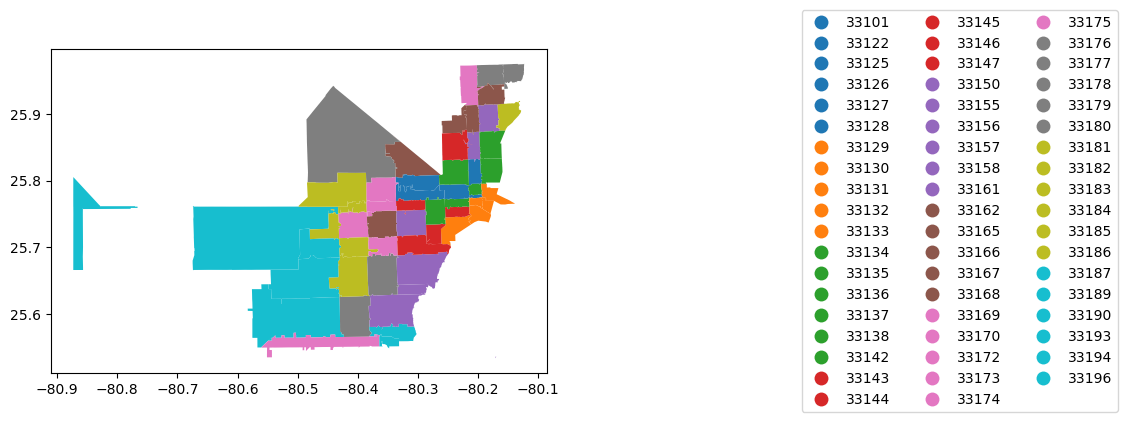

In [10]:
plt = zip_map[zip_map["primary_city"]=="Miami"].plot(
  column="zip",
  legend=True,
  legend_kwds={"loc": "center left", "bbox_to_anchor": (1.5, 0.5), "ncol": 3}
)

In [28]:
zip_map[zip_map["primary_city"]=="Miami"].head()


,INTPTLAT10,INTPTLON10,geometry,zip,primary_city,county,timezone,area_codes,"county, state"
69,+25.7347340,-080.4067568,"MULTIPOLYGON (((-80.38313 25.73648, -80.38191 ...",33175,Miami,Miami-Dade County,America/New_York,"305, 786","Miami-Dade County, FL"
70,+25.5961291,-080.4041945,"POLYGON ((-80.38088 25.59545, -80.38089 25.594...",33177,Miami,Miami-Dade County,America/New_York,"305, 786","Miami-Dade County, FL"
71,+25.7139385,-080.5836189,"MULTIPOLYGON (((-80.82238 25.76172, -80.82156 ...",33194,Miami,Miami-Dade County,America/New_York,"305, 786","Miami-Dade County, FL"
72,+25.7286620,-080.2399959,"POLYGON ((-80.26108 25.71191, -80.26111 25.712...",33133,Miami,Miami-Dade County,America/New_York,"305, 786","Miami-Dade County, FL"
73,+25.7531315,-080.2344271,"POLYGON ((-80.23661 25.76063, -80.23458 25.760...",33145,Miami,Miami-Dade County,America/New_York,"305, 786","Miami-Dade County, FL"


In [30]:
neighborhood_map = gpd.read_file("Miami_Neighborhoods_Shapefile (1).geojson")
neighborhood_map = neighborhood_map.drop(columns=(["Shape__Length", "Shape__Area"]), axis=1)
neighborhood_map

,FID,LABEL,Shape_STAr,Shape_STLe,geometry
0,1,Shorecrest,1.153765e+07,20928.416688,"POLYGON ((-80.18525 25.85151, -80.18544 25.855..."
1,2,Oakland Grove,1.879151e+06,5395.528216,"POLYGON ((-80.19299 25.85346, -80.19298 25.853..."
2,3,Little River Gardens,1.771478e+06,5387.961815,"POLYGON ((-80.19299 25.85346, -80.19296 25.852..."
3,4,Biscayne Plaza,2.435469e+06,6895.831377,"POLYGON ((-80.18847 25.85217, -80.18839 25.852..."
4,5,Pelican Harbor,1.205716e+06,9194.592739,"POLYGON ((-80.16760 25.84989, -80.16683 25.849..."
...,...,...,...,...,...
102,103,Riverfront,2.707429e+06,7977.513998,"POLYGON ((-80.19765 25.77265, -80.19724 25.772..."
103,104,Watson Island,4.152653e+06,10661.382447,"POLYGON ((-80.17867 25.78783, -80.17841 25.787..."
104,105,Port of Miami,2.036785e+07,30295.230036,"POLYGON ((-80.16019 25.77280, -80.16014 25.772..."
105,106,Virginia Key,3.604123e+07,63571.823896,"POLYGON ((-80.14769 25.75822, -80.14737 25.758..."


In [18]:
neighborhood_map = pd.read_csv("usneighborhoods.csv")
neighborhood_map["length"] = neighborhood_map["zips"].apply(len)
neighborhood_map[(neighborhood_map["state_id"]=="FL")&(neighborhood_map["city_name"]=="Miami")].sort_values(by="length", ascending=False).head(30)

,neighborhood,neighborhood_ascii,lat,lng,city_name,city_id,state_name,state_id,source,timezone,zips,county_fips,county_name,id,length
1529,Cbd,Cbd,25.77428,-80.19101,Miami,1840015149,Florida,FL,polygon,America/New_York,33132 33131 33130,12086,Miami-Dade,184001514911113,17
1576,Flagami,Flagami,25.77039,-80.28443,Miami,1840015149,Florida,FL,polygon,America/New_York,33144 33134 33126,12086,Miami-Dade,184001514911160,17
1560,Parkwest,Parkwest,25.78266,-80.19301,Miami,1840015149,Florida,FL,polygon,America/New_York,33136 33132,12086,Miami-Dade,184001514911144,11
1545,Vizcaya,Vizcaya,25.74323,-80.21301,Miami,1840015149,Florida,FL,polygon,America/New_York,33133 33129,12086,Miami-Dade,184001514911129,11
1546,Brickell Village,Brickell Village,25.76550,-80.19351,Miami,1840015149,Florida,FL,polygon,America/New_York,33131 33130,12086,Miami-Dade,184001514911130,11
1549,Highland Park,Highland Park,25.78560,-80.21077,Miami,1840015149,Florida,FL,polygon,America/New_York,33136 33125,12086,Miami-Dade,184001514911133,11
1551,Watson Island,Watson Island,25.78453,-80.17498,Miami,1840015149,Florida,FL,polygon,America/New_York,33139 33132,12086,Miami-Dade,184001514911135,11
1552,Little River Industrial District,Little River Industrial District,25.83779,-80.19118,Miami,1840015149,Florida,FL,polygon,America/New_York,33138 33137,12086,Miami-Dade,184001514911136,11
1603,Allapattah Industrial District,Allapattah Industrial District,25.79661,-80.22252,Miami,1840015149,Florida,FL,polygon,America/New_York,33142 33127,12086,Miami-Dade,184001514911187,11
1555,Shenandoah North,Shenandoah North,25.76174,-80.22633,Miami,1840015149,Florida,FL,polygon,America/New_York,33145 33135,12086,Miami-Dade,184001514911139,11


In [26]:
neighborhood_map_2 = neighborhood_map.copy()
neighborhood_map_2[["1", "2", "3"]] = neighborhood_map["zips"].str.split(" ", 2, expand=True)
neighborhood_map_2.sort_values(by="3", ascending=False)

C:\Users\jgonzalezt\AppData\Local\Temp\ipykernel_16544\4051728114.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  neighborhood_map_2[["1", "2", "3"]] = neighborhood_map["zips"].str.split(" ", 2, expand=True)


,neighborhood,neighborhood_ascii,lat,lng,city_name,city_id,state_name,state_id,source,timezone,zips,county_fips,county_name,id,length,1,2,3
3169,Rainier Valley,Rainier Valley,47.53935,-122.27524,Seattle,1840021117,Washington,WA,polygon,America/Los_Angeles,98118 98144 98178,53033,King,184002111710132,17,98118,98144,98178
3157,Central Business District,Central Business District,47.60835,-122.33470,Seattle,1840021117,Washington,WA,polygon,America/Los_Angeles,98104 98101 98154 98164 98174,53033,King,184002111711184,29,98104,98101,98154 98164 98174
3125,Arbor Heights,Arbor Heights,47.50923,-122.37957,Seattle,1840021117,Washington,WA,polygon,America/Los_Angeles,98126 98136 98146,53033,King,184002111711152,17,98126,98136,98146
3123,Fauntleroy,Fauntleroy,47.52255,-122.38866,Seattle,1840021117,Washington,WA,polygon,America/Los_Angeles,98126 98136 98146,53033,King,184002111711150,17,98126,98136,98146
3170,Beacon Hill,Beacon Hill,47.55412,-122.30161,Seattle,1840021117,Washington,WA,polygon,America/Los_Angeles,98108 98118 98144,53033,King,184002111710133,17,98108,98118,98144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3587,Buckhead,Buckhead,33.83955,-84.37937,Atlanta,1840013660,Georgia,GA,point,America/New_York,30305,13121,Fulton,184001366014125,5,30305,None,None
3588,Blair Village,Blair Village,33.65761,-84.37020,Atlanta,1840013660,Georgia,GA,point,America/New_York,30354,13121,Fulton,184001366014126,5,30354,None,None
3589,West Tampa,West Tampa,27.95335,-82.48926,Tampa,1840015982,Florida,FL,point,America/New_York,33607,12057,Hillsborough,184001598214105,5,33607,None,None
3590,Terra Cotta,Terra Cotta,38.95372,-76.99831,Washington,1840006060,District of Columbia,DC,point,America/New_York,20011,11001,District of Columbia,184000606014149,5,20011,None,None


In [29]:
neighborhood_map.sort_values(by="length", ascending=False)

,neighborhood,neighborhood_ascii,lat,lng,city_name,city_id,state_name,state_id,source,timezone,zips,county_fips,county_name,id,length
2000,Manhattan,Manhattan,40.77809,-73.96831,New York,1840034016,New York,NY,polygon,America/New_York,10103 10128 10169 10168 10167 10165 10162 1002...,36061,New York,184003401610103,413
1999,Queens,Queens,40.72048,-73.81774,New York,1840034016,New York,NY,polygon,America/New_York,11451 11439 11432 11433 11430 11436 11434 1143...,36081,Queens,184003401610102,401
1998,Brooklyn,Brooklyn,40.64558,-73.94976,New York,1840034016,New York,NY,polygon,America/New_York,11249 11201 11203 11205 11207 11206 11209 1120...,36047,Kings,184003401610101,227
1997,Bronx,Bronx,40.85369,-73.86761,New York,1840034016,New York,NY,polygon,America/New_York,10475 10474 10471 10470 10473 10472 10453 1045...,36005,Bronx,184003401610100,155
1725,Midtown,Midtown,40.75509,-73.97612,New York,1840034016,New York,NY,polygon,America/New_York,10103 10169 10167 10022 10020 10001 10112 1011...,36061,New York,184003401611118,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,Palmridge Drive,Palmridge Drive,36.20352,-115.28242,Las Vegas,1840020364,Nevada,NV,polygon,America/Los_Angeles,89134,32003,Clark,184002036412107,5
1314,Breakers Creek Drive,Breakers Creek Drive,36.21076,-115.32710,Las Vegas,1840020364,Nevada,NV,polygon,America/Los_Angeles,89134,32003,Clark,184002036412108,5
1315,Manchester Park,Manchester Park,36.29723,-115.33117,Las Vegas,1840020364,Nevada,NV,polygon,America/Los_Angeles,89166,32003,Clark,184002036412109,5
1316,The Residence at Canyon Gate,The Residence at Canyon Gate,36.14703,-115.29558,Las Vegas,1840020364,Nevada,NV,polygon,America/Los_Angeles,89117,32003,Clark,184002036412110,5
